In [1]:

from geodude.ops import buft, buft_fill
from geodude.parameter import Prm, unpack_prms, prms
from shapely.geometry import Point
from shapely import buffer, MultiPolygon, MultiLineString
import numpy as np
from functools import partial
%load_ext autoreload
%autoreload 2

In [5]:
d_buffer = Prm(10.,)
d_translate = Prm(1.,)
deg = Prm(np.random.uniform, 0, 30)

In [55]:
ps = []
p = Point(0,0).buffer(10)
n_iters = 10
deg = Prm(iter(np.arange(0, 360, 360/n_iters)), iterate=True)
pset = prms(d_buffer=0.9, d_translate=0.4, deg=deg)
for ii in range(n_iters):
    p = buft(p, **pset)
    ps.append(p)

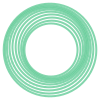

In [56]:
MultiPolygon(ps).boundary

In [69]:
buft_cfg()

{'d_buffer': -0.9, 'd_translate': 1.0, 'deg': 85.85840300176065}

In [70]:
ps = []
p = Point(0,0).buffer(10)
n_iters = 10
d_buffer = Prm(-0.9)
d_translater = Prm(10)
deg = Prm(lambda x: np.sin(x.centroid.x/10)*180)
buft_cfg = Prm(lambda : dict(d_buffer=d_buffer(), d_translate=d_translate(), deg=deg(p)))  # decent pattern?
for ii in range(n_iters):
    p = buft(p, **buft_cfg())
    ps.append(p)

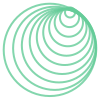

In [71]:
MultiPolygon(ps).boundary

In [86]:
p = Point(0,0).buffer(10)
d_buffer = Prm(-0.9)
d_translate = Prm(lambda : d_buffer() * 0.9)
deg = Prm(180)
buft_cfg = Prm(
    lambda : dict(
        d_buffer=d_buffer(), 
        d_translate=d_translate(), 
        deg=deg(),
        )
    )


In [6]:
s = Prm(d_buffer)

In [8]:
s()

-0.9

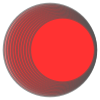

In [5]:
p = Point(0,0).buffer(10)
d_buffer = Prm(-0.3)
d_translate = Prm(lambda : d_buffer() * 0.9)
deg = Prm(180)
buft_fill(
    geom=p, 
    d_translate=d_translate, 
    d_buffer=d_buffer, 
    deg=deg, 
    n_iters=10)

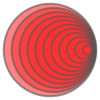

In [6]:
buft_fill(
    geom=p, 
    deg=deg, 
    n_iters=10)